Consider classical benchmark system in control theory - inverted pendulum
on a cart (Figure 1). It is nonlinear under-actuated system that has the following
dynamics
$$(M + m)\ddot{x} − ml cos(\theta) \ddot{\theta}+ ml sin(\theta) \dot{\theta}^2 = F (1)$$ 
$$− cos(\theta)\ddot{x} + l\ddot{\theta}− g sin(\theta) = 0 (2) $$
where g = 9.81 is gravitational acceleration.

The system dynamics can be written in state space form:
$$\dot{z} = f (z) + g(z)u$$
$$y = h(z) = \begin{bmatrix}x & \theta\end{bmatrix}^T$$

where $z =  \begin{bmatrix}x & \theta & \dot{x} & \dot{\theta}\end{bmatrix}^T$
is the state vector of the system, y is the output vector. The dynamics of the system around unstable equilibrium of the pendulum $(\bar{z} = \begin{bmatrix} 0 & 0 & 0 & 0 \end{bmatrix}^T)$ can be described by a linear system
$$\delta \dot{z} = A\delta z + B\delta u$$
$$\delta y = C\delta z$$
that is obtained from linearization of the nonlinear dynamics around $ \bar{z} $.

**Parameters**

$$\ddot{x} = \frac{msin(\theta)(gcos(\theta)-l\dot{\theta}^2) + F}{M+msin^2(\theta)}$$

$$\ddot{\theta} = \frac{Fcos(\theta)}{l(M+msin^2(\theta))} + 
\frac{sin(\theta)(g(M+m) - lmcos(\theta)\dot{\theta}^2)}{l(M+msin^2(\theta))} $$

$$\dot{z} = f (z) + g(z)u= \begin{bmatrix} \dot{x} \\ \dot{\theta}\\ \ddot{x} \\ \ddot{\theta}\end{bmatrix} = 
\begin{bmatrix} 
\dot{x}\\ 
\dot{\theta} \\ 
\frac{msin(\theta)(gcos(\theta)-l\dot{\theta}^2)}{M+msin^2(\theta)} \\
\frac{sin(\theta)(g(M+m) - lmcos(\theta)\dot{\theta}^2)}{l(M+msin^2(\theta))} \end{bmatrix} + F 
\begin{bmatrix} 0 \\ 0 \\ \frac{1}{M+msin^2(\theta)}\\ \frac{cos(\theta)}{l(M+msin^2(\theta))} \end{bmatrix}$$

$$y = h(z) = \begin{bmatrix} x \\ \theta\end{bmatrix}$$

**Linearization**

$$A = \frac{\delta f(z)}{\delta z} = 
\begin{bmatrix} 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & \frac{mg}{M} & 0 & 0 \\ 0 & \frac{g(M+m)}{lM} & 0 & 0\end{bmatrix}$$

$$B = g(\bar{z}) = \begin{bmatrix} 0 \\ 0 \\ \frac{1}{M} \\ \frac{1}{lM}\end{bmatrix}$$

$$C = \frac{\delta h(z)}{\delta z} = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \end{bmatrix}$$

Choose reasonable values for M , m and l then complete the following tasks:
1. Prove that it is possible to design state observer linearized system

**Answer**

System is observable, if matrix $S = \begin{bmatrix} C \\ CA \\ CA^2 \\ CA^3\end{bmatrix}$ has rank 4

$$C = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \end{bmatrix}$$

$$CA = \begin{bmatrix} 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix}$$

$$CA^2 = \begin{bmatrix} 0 & \frac{mg}{M} & 0 & 0 \\ 0 & \frac{g(m+M)}{lM} & 0 & 0 \end{bmatrix}$$

$$CA^3 = \begin{bmatrix} 0 & 0 & 0 & \frac{mg}{M} \\ 0 & 0 & 0 & \frac{g(m+M)}{lM}\end{bmatrix}$$


$$S = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & \frac{mg}{M} & 0 & 0 \\ 0 & \frac{g(m+M)}{lM} & 0 & 0 \\ 0 & 0 & 0 & \frac{mg}{M} \\ 0 & 0 & 0 & \frac{g(m+M)}{lM} \end{bmatrix}$$

We can defenetly see the Identity matrix 4x4 at the upper part of the S matrix, thus its rank is 4

2. For open loop state observer, is the error dynamics stable?

**Answer**

Open-loop state observer has a form: $\hat{\dot{z}} = A\hat{z} + Bu$

Error dynamics:
    
$\epsilon = \hat{z} - z$, $\dot{z} = Az + Bu$ , $\dot{\epsilon} = A \epsilon $

Thus, open loop state observe is stable, when A is negative definite, which is not the case, becaue:

$Det (\begin{bmatrix} -\lambda & 0 & 1 \\ 0 & -\lambda & 0 & 1 \\ 0 & \frac{mg}{M} & -\lambda & 0 \\ 0 & \frac{g(M+m)}{lM} & 0 & -\lambda \end{bmatrix}) = -\lambda(-\lambda^3 + \lambda(\frac{g(M+m)}{lM})) = \lambda^2(\lambda^2 - \frac{g(M+m)}{lM})$ if $\lambda = 0 $ or $\lambda = \pm \sqrt{\frac{g(M+m)}{lM}}$

3. Design Luenberger observer for linearized system using both pole placement and LQR methods

Luenberger observer has form: 
$$\hat{\dot{z}}_{k+1} = A\hat{z_k} + Bu_k + L (y_k - \hat{y_k})$$
$$\hat{y_k} = C\hat{z_k} + Du_k$$

In the given case, $D = 0$

Pole placement method:

it is usually used in case: $A - BL \prec 0 $, 

now the system $A - LC \prec  0 $ is given, if it is transposed: $A^T-C^TL^T \prec 0 $ 
$$L^T = poles(A^T, C^T, eigVals)$$

LQR method (possible, because, C is a part of Identity matrix):

$$L^T = lqr(A^T, C^T, Q, R)$$
    

In [47]:
# this cell is more about 3-rd ask
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.integrate import odeint
import scipy.linalg as lin

g = 9.81
M = 0.2
m = 1
l = 0.1

eig = [-1.1, -1.2, -1.3, -1.4]

A = np.array([[0, 0, 1, 0], [0, 0, 0, 1], [0, g*m/M, 0, 0], [0, g*(M+m)/l/M, 0, 0]])
B = np.array([0, 0, 1/M, 1/l/M]).reshape(1, -1).T
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])
#  pole placement method
pole = sig.place_poles(A.T, C.T, eig)
L_pole = pole.gain_matrix.T

# lqr method
# Q, R - random, but appropriate
Q = np.array([[1, 0, 0, 0], 
              [0, 1, 0, 0], 
              [0, 0, 1, 0], 
              [0, 0, 0, 1]])

R = np.array([[4, 1], [1, 4]]) 

S = lin.solve_continuous_are(A.T, C.T, Q, R)
L_lqr = np.array(np.linalg.inv(R)).dot(C).dot(S).T

In [48]:
# these cells are more about 5-th task
pole = sig.place_poles(A, B, eig)
P = -pole.gain_matrix

In [52]:
def usual(x, t, u):
    n = np.dot(A, x) + np.dot(B, u)
    return  n


def observer(x_hat, t, u, x):
#     TRY WITH BOTH: L_lqr and L_pole
    return np.dot(A, x_hat) + np.dot(B, u) + np.dot(L_lqr, C).dot(x - x_hat) #TODO - run with both: LQR and ploe

dt = 1/10000
T = 20
time = np.linspace(0, T, dt**(-1))

x = [np.array([0.5, 0.1, 0.03, 0.01])]
x_hat = [np.array([0.4, 0.007, 0.9, 0.1])]

for i in range(1, len(time)):
#     Use odeint between two dots,
#     BUT u is fixed between two poins
#     P controller u = Px
    local_time = np.linspace(time[i-1], time[i])
    u = np.dot(P, x[-1])

    x_dot = odeint(usual, x[-1], local_time, args=tuple([u]))
    x.append(x_dot[-1])
    
    x_hat_dot = odeint(observer, x_hat[-1], local_time, args=tuple([u, x[-1]]))
    x_hat.append(x_hat_dot[-1])


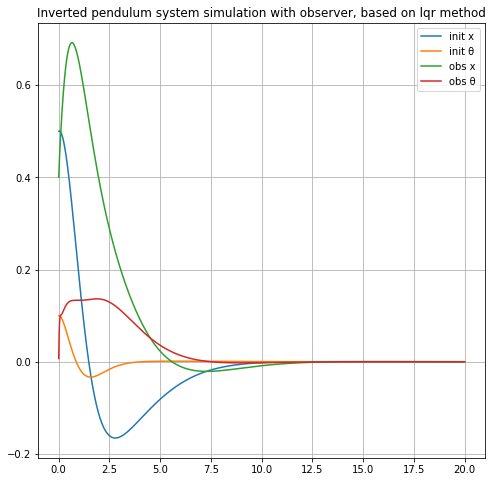

In [53]:
def plot_sim(x, x_hat, time):
    x = np.array(x)
    y = np.dot(C, x.T)
    x_hat = np.array(x_hat)
    y_hat = np.dot(C, x_hat.T)

    plt.figure(figsize=(8, 8))
    plt.title("Inverted pendulum system simulation with observer, based on lqr method")
    plt.plot(time, y[0], label="init x")
    plt.plot(time, y[1], label="init θ")

    plt.plot(time, y_hat[0], label="obs x")
    plt.plot(time, y_hat[1], label="obs θ")
    plt.grid()
    plt.legend()
plot_sim(x, x_hat, time)
plt.savefig("task53_lqr.png") # 3 and 5 are connected

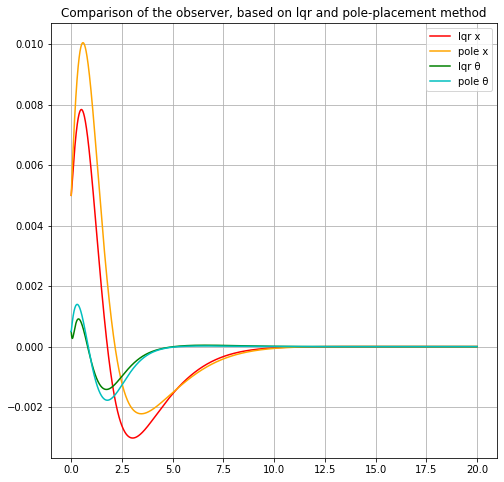

In [46]:
plt.figure(figsize=(8, 8))
plt.title("Comparison of the observer, based on lqr and pole-placement method")
plt.plot(time, obs_lqr[0], "r", label="lqr x")
plt.plot(time, obs_pole[0], c="orange",label="pole x")
plt.plot(time, obs_lqr[1],"g", label="lqr θ")
plt.plot(time, obs_pole[1], "c", label="pole θ")
plt.grid()
plt.legend()
plt.savefig("pole_lqr.png")

4. Design state feedback controller for linearized system (or use the one from previous homework)

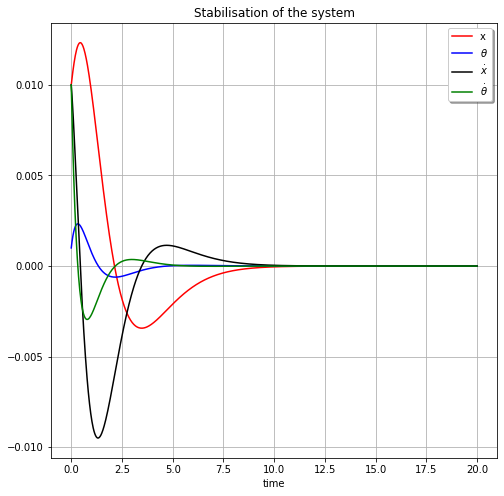

In [15]:
res_pole = sig.place_poles(A, B, eig)
K = res_pole.gain_matrix

# visualization
def control(x, t):
    return np.dot(A - np.dot(B, K), x)

time = np.linspace(0, 20, 1000)   
x0 = x[0]
res = odeint(control, x0, time).T

fig = plt.figure(figsize=(8, 8))
plt.title("Stabilisation of the system")
plt.xlabel("time")
plt.plot(time, res[0], "r-", label="x")
plt.plot(time, res[1], "b-", label="$θ$")
plt.plot(time, res[2], "k-", label="$\dot{x}$")
plt.plot(time, res[3], "g-", label="$\dot{θ}$")
plt.grid()
plt.legend(shadow=True)
plt.savefig("task4.png")

5. Simulate nonlinear system with Luenberger observer and state feedback controller that uses estimated states ($u = K \hat{x}$). Make sure that the system is stabilized for various initial conditions around $\bar{z}$. For simulation use the strategy we discussed during the last lab

Look at task 3

6. Add white gaussian noise to the output ($\delta y = C\delta z + v$). What happens to the state estimation?

In [21]:
def usual(x, t, u):
    n = np.dot(A, x) + np.dot(B, u)
    return  n


def observer(x_hat, t, u, dy):
    return np.dot(A, x_hat) + np.dot(B, u) + np.dot(L_lqr, dy - np.dot(C, x_hat))

dt = 1/10000
T = 20
time = np.linspace(0, T, dt**(-1))

x = [np.array([0.01, 0.001, 0.01, 0.01])]
x_hat = [np.array([0.02, 0.002, 0.02, 0.02])/4]


for i in range(1, len(time)):
#     TODO: use odeint between two dots,
#     BUT u is fixed between two poins
#     P controller u = P
    local_time = np.linspace(time[i-1], time[i])
    u = np.dot(P, x[-1])

    x_dot = odeint(usual, x[-1], local_time, args=tuple([u]))
    x.append(x_dot[-1])
    
    dy = np.dot(C, x[-1]) 
    dy += np.random.random(2) * 0.0005
    x_hat_dot = odeint(observer, x_hat[-1], local_time, args=tuple([u, dy]))
    x_hat.append(x_hat_dot[-1])


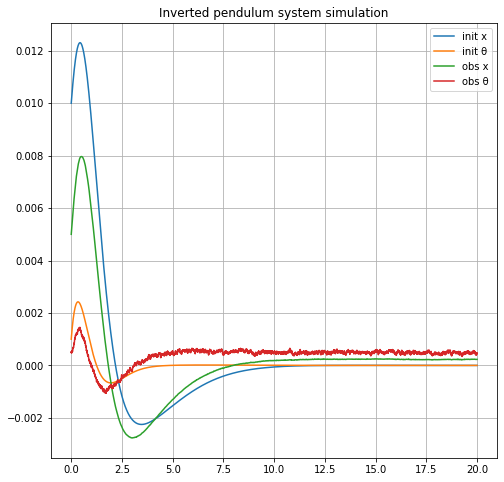

In [22]:
plot_sim(x, x_hat, time)
plt.savefig("task6.png")

7. Add white gaussian noise to the dynamics ($\delta \dot{z} = A\delta z + B\delta u + w$). What happens to the state estimation and control system?

In [23]:
def usual(x, t, u):
    n = np.dot(A, x) + np.dot(B, u) + np.random.random(4) * 0.00005
    return  n


def observer(x_hat, t, u, dy):
    return np.dot(A, x_hat) + np.dot(B, u) + np.dot(L_lqr, dy - np.dot(C, x_hat))

dt = 1/10000
T = 20
time = np.linspace(0, T, dt**(-1))

x = [np.array([0.01, 0.001, 0.01, 0.01])]
x_hat = [np.array([0.02, 0.002, 0.02, 0.02])/4]


for i in range(1, len(time)):
#     use odeint between two dots,
#     BUT u is fixed between two poins
#     P controller u = Px
    local_time = np.linspace(time[i-1], time[i])
    u = np.dot(P, x[-1])

    x_dot = odeint(usual, x[-1], local_time, args=tuple([u]))
    x.append(x_dot[-1])
    
    dy = np.dot(C, x[-1]) 
    dy += np.random.random(2) * 0.0005
    x_hat_dot = odeint(observer, x_hat[-1], local_time, args=tuple([u, dy]))
    x_hat.append(x_hat_dot[-1])


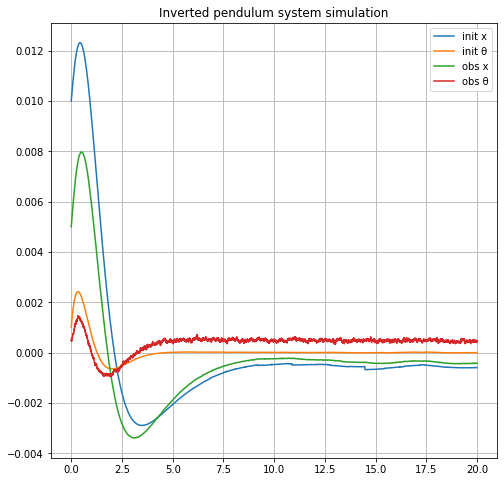

In [24]:
plot_sim(x, x_hat, time)
plt.savefig("task7.png")

8. **extra mark** implement LQG controller

### Links

- [Observability](https://en.wikipedia.org/wiki/Observability)
- [Luenberger observer](https://en.wikipedia.org/wiki/State_observer)
- [LQG controller](https://homes.cs.washington.edu/~todorov/courses/amath579/LQG.pdf)